## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import random

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/AIMLColab/Machine Learning/ML-Project/Loan_Modelling.csv')

## Data Overview

### Checking rows and column

In [ ]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 5000 rows and 14 columns.


In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


  ### Checking the shape of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Checking null and duplicated vaulues and its statical summary

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* All data captured are int64 with only exception of CCAvg as float.
* There are no null values

In [ ]:
df.duplicated().sum()

0

* There are no duplicate in the data

In [ ]:
# apply(lambda x: x.apply('{0:.5f}'.format) used to suppress scientific notation to display 5 decimal places
df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,2500.500,45.338,20.105,73.774,93169.257,2.396,1.938,1.881,56.499,0.096,0.104,0.060,0.597,0.294
std,1443.520,11.463,11.468,46.034,1759.455,1.148,1.748,0.840,101.714,0.295,0.306,0.238,0.491,0.456
min,1.000,23.000,-3.000,8.000,90005.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1250.750,35.000,10.000,39.000,91911.000,1.000,0.700,1.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2500.500,45.000,20.000,64.000,93437.000,2.000,1.500,2.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,3750.250,55.000,30.000,98.000,94608.000,3.000,2.500,3.000,101.000,0.000,0.000,0.000,1.000,1.000
max,5000.000,67.000,43.000,224.000,96651.000,4.000,10.000,3.000,635.000,1.000,1.000,1.000,1.000,1.000


**Statical Summary of the data**
* Avg. Age of customer is 45, Experience is 20, Income is 73K
* Avg. CC Spending is 1.93K and Avg. house Mortage is 56K



### Data observation on few more column

In [ ]:
print(df['Personal_Loan'].value_counts()[1], 'Customers have accepted personal loan during campain and', df['Personal_Loan'].value_counts()[0], 'Customers rejected or didn not apply for personal offer')

480 Customers have accepted personal loan during campain and 4520 Customers rejected or didn not apply for personal offer


In [ ]:
print(df['Securities_Account'].value_counts()[1], 'Customers have securities account and', df['Securities_Account'].value_counts()[0], 'Customers do not have securities account')

522 Customers have securities account and 4478 Customers do not have securities account


In [ ]:
print(df['CD_Account'].value_counts()[1], 'Customers have CD account and', df['CD_Account'].value_counts()[0], 'Customers do not have CD account')

302 Customers have CD account and 4698 Customers do not have CD account


In [ ]:
print(df['CreditCard'].value_counts()[1], 'Customers using credit card issued by other bank and', df['CreditCard'].value_counts()[0], 'Customers using credit card issued by AllLife Bank')

1470 Customers using credit card issued by other bank and 3530 Customers using credit card issued by AllLife Bank


In [ ]:
print(df['Online'].value_counts()[1],'Customers have online accounts and', df['Online'].value_counts()[0], 'Customers do not have online accounts')

2984 Customers have online accounts and 2016 Customers do not have online accounts


In [ ]:
print('There are ',df['Education'].value_counts()[1],'Undergraduates in the data')
print('There are ',df['Education'].value_counts()[2],'Graduates in the data')
print('There are ',df['Education'].value_counts()[3],'Professional in the data')

There are  2096 Undergraduates in the data
There are  1403 Graduates in the data
There are  1501 Professional in the data


**Lets Analyze ZipCode, Experience**

In [ ]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
df[df['Experience']<0]['Experience'].unique()

array([-1, -2, -3])

In [ ]:
df['ZIPCode'].nunique()

467

In [ ]:
df[df['Income']< 0]['Income'].unique()

array([], dtype=int64)

In [ ]:
df[df['Mortgage']< 0]['Mortgage'].unique()

array([], dtype=int64)

In [ ]:
df[df['CCAvg']< 0]['CCAvg'].unique()

array([], dtype=float64)

**Observation on Data**
* Experience has some negative values, **we can convert them as positive values**
* There are 467 unique Zipcodes, **lets convert Zipcode as categorical value by considering 2 digit, as 2 digit can represent a region**
* We can consider **ZipCode, Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard** as categorical values

## Exploratory Data Analysis.

### Univariate Analysis

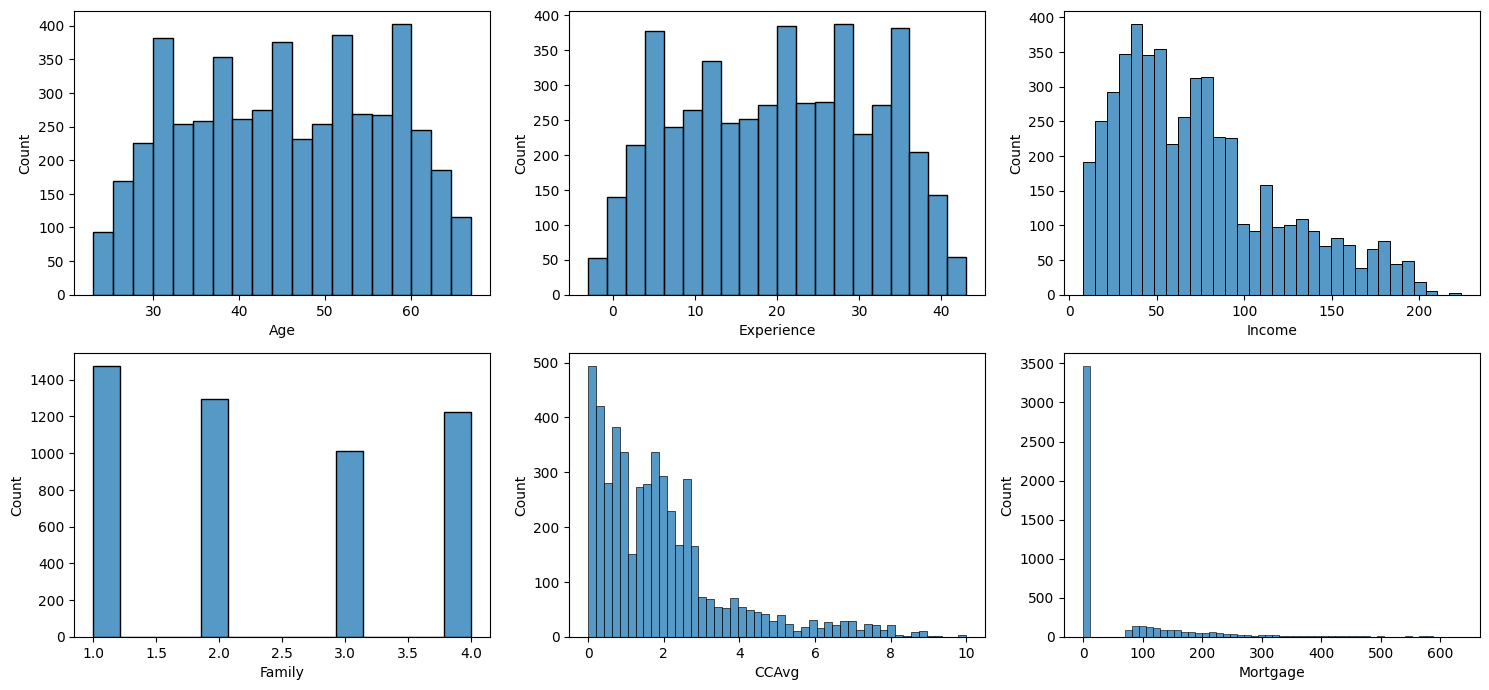

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=df, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

* **Income**, **CCAvg** and **Mortage** exhibit right skewed distribution

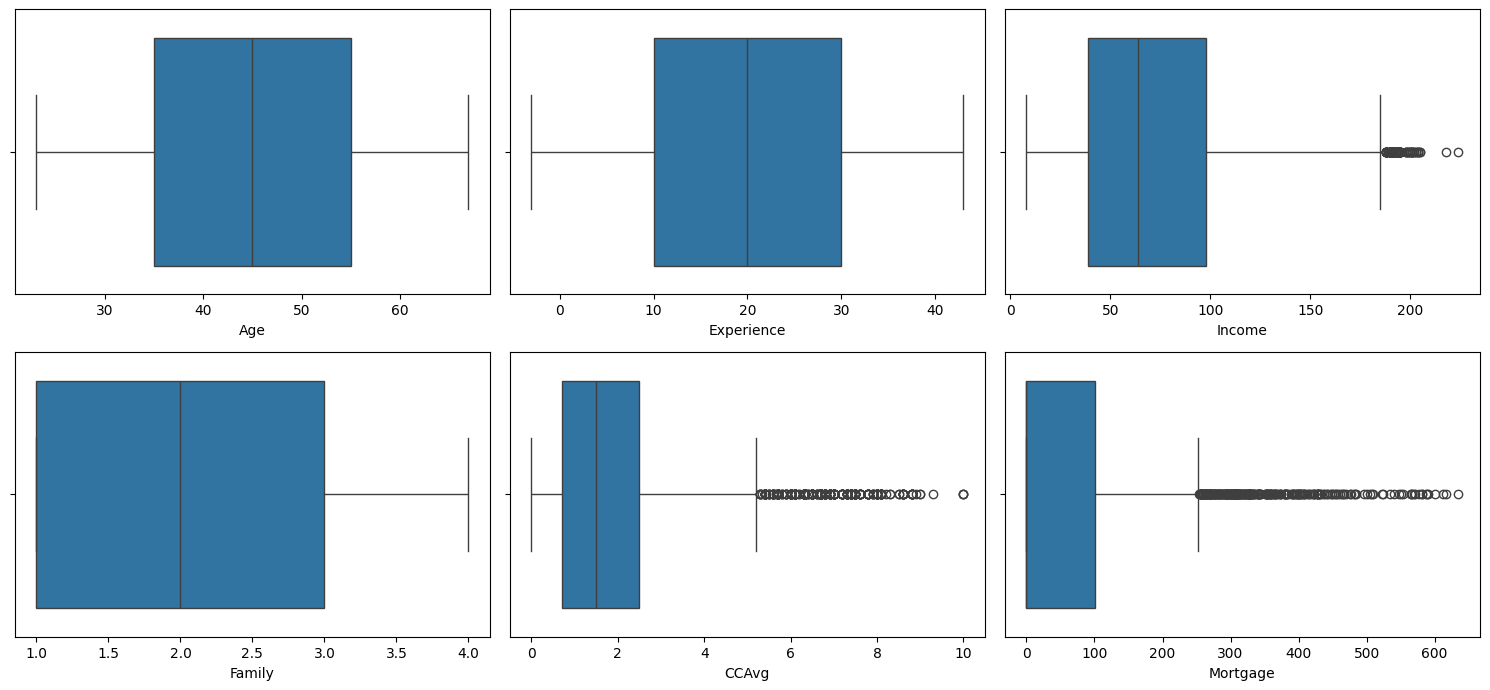

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
num_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# plotting the histogram for each numerical feature
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=df, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

* There are outliers in **Income**, **CCAvg** and **Mortage**

### Lets find percentage of outliers

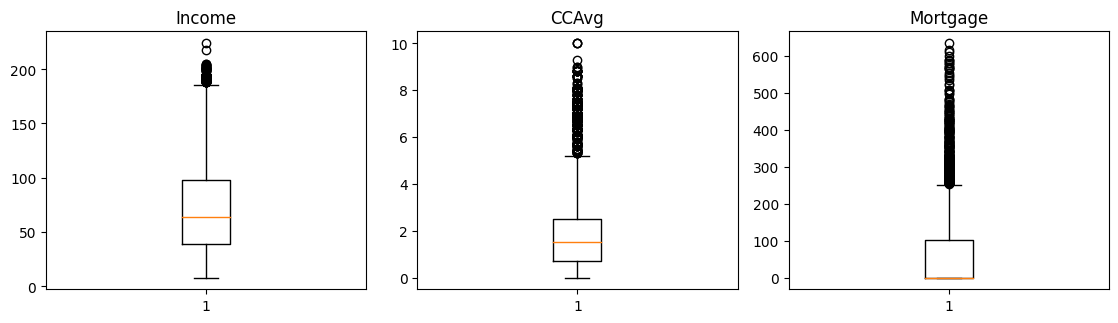

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Income', 'CCAvg', 'Mortgage']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Let's find the percentage of outliers, in each column of the data, using IQR.**

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
#print('Q1-> {}'.format(Q1))
#print('Q3-> {}'.format(Q3))
IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)
#print('IQR ->{}'.format(IQR))
lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR
#print('lower_whisker -> {}'.format(lower_whisker))
#print('upper_whisker -> {}'.format(upper_whisker))

In [ ]:
# Percentage of outliers in each column
#print('((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100 ->{}'.format(((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100))
((df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker)).sum()/df.shape[0]*100

,0
Income,1.92
CCAvg,6.48
Mortgage,5.82


Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



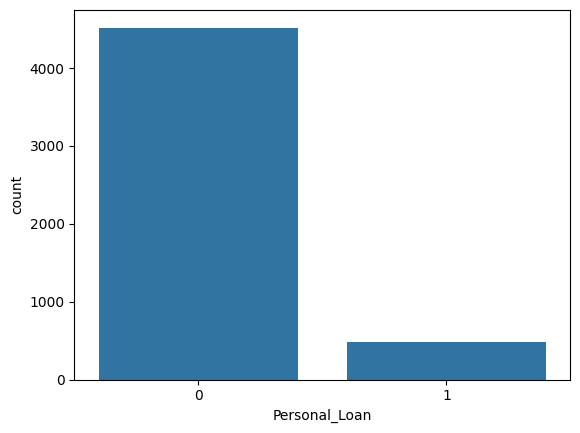

In [ ]:
# checking the distribution of the categories in Personal loan
print(100*df['Personal_Loan'].value_counts(normalize=True), '\n')

# plotting the count plot for Personal loan
sns.countplot(data=df, x='Personal_Loan');

* ~90% of customer didn't apply for personal loan during last campaign

CD_Account
0    93.96
1     6.04
Name: proportion, dtype: float64 



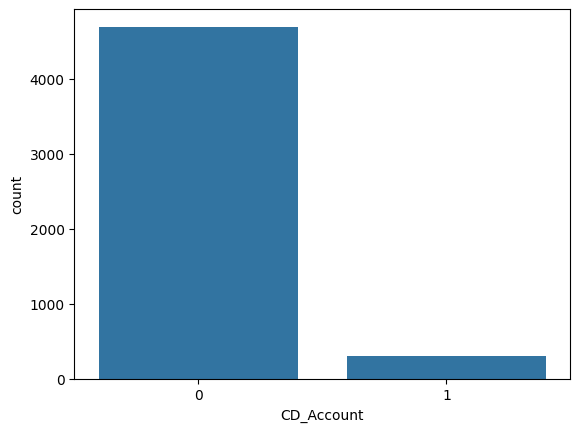

In [ ]:
# checking the distribution of the categories in Personal loan
print(100*df['CD_Account'].value_counts(normalize=True), '\n')

# plotting the count plot for Personal loan
sns.countplot(data=df, x='CD_Account');

* **94%** of customer doesn't have CD account with the bank

Online
1    59.68
0    40.32
Name: proportion, dtype: float64 



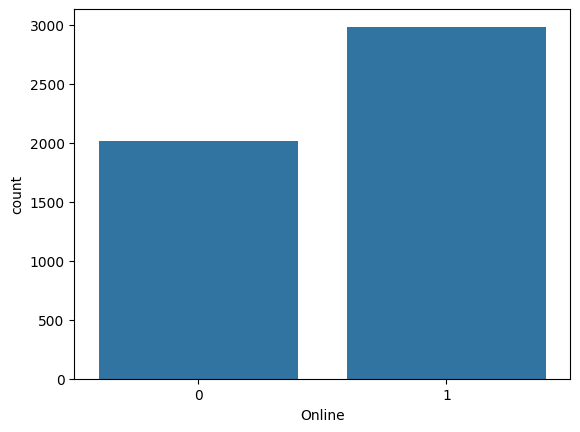

In [ ]:
# checking the distribution of the categories in Personal loan
print(100*df['Online'].value_counts(normalize=True), '\n')

# plotting the count plot for Personal loan
sns.countplot(data=df, x='Online');

* ~60% of the customer are usig Online banking facilities

CreditCard
0    70.6
1    29.4
Name: proportion, dtype: float64 



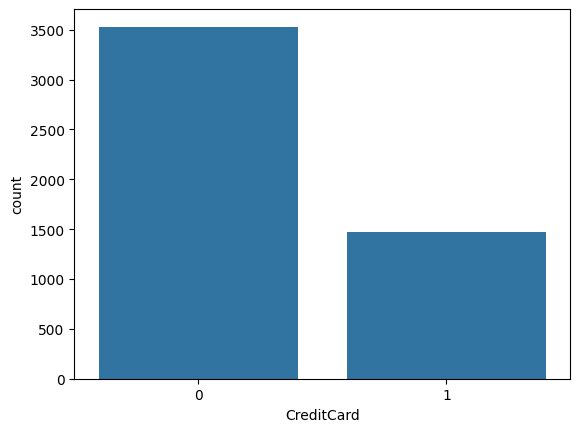

In [ ]:
# checking the distribution of the categories in Personal loan
print(100*df['CreditCard'].value_counts(normalize=True), '\n')

# plotting the count plot for Personal loan
sns.countplot(data=df, x='CreditCard');

* ~70% of users uses Credit card issued by other bank

### Bivariete Analysis

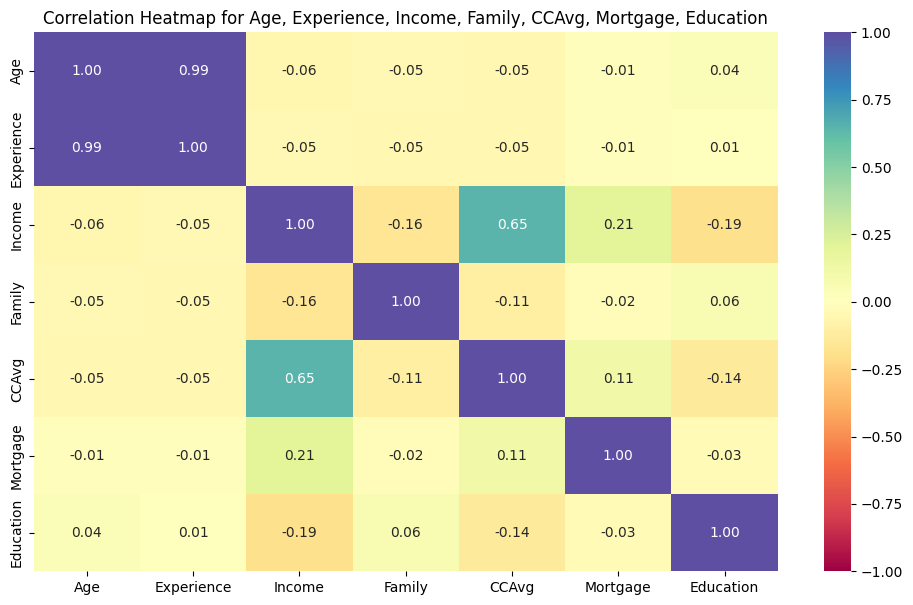

In [ ]:
# defining the size of the plot
plt.figure(figsize=(12, 7))
# defining the list of numerical features to plot
num_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education']

# plotting the heatmap for correlation
sns.heatmap(
    df[num_features].corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);
plt.title('Correlation Heatmap for Age, Experience, Income, Family, CCAvg, Mortgage, Education');

* There is a positive corelation between Income and Credit Card spending
* There is a positive corelation between Income and Mortage but not as strong as Income and Credit Card spending
* There is negative corelation between Income with **Age** and **Experience**

<Figure size 1200x800 with 0 Axes>

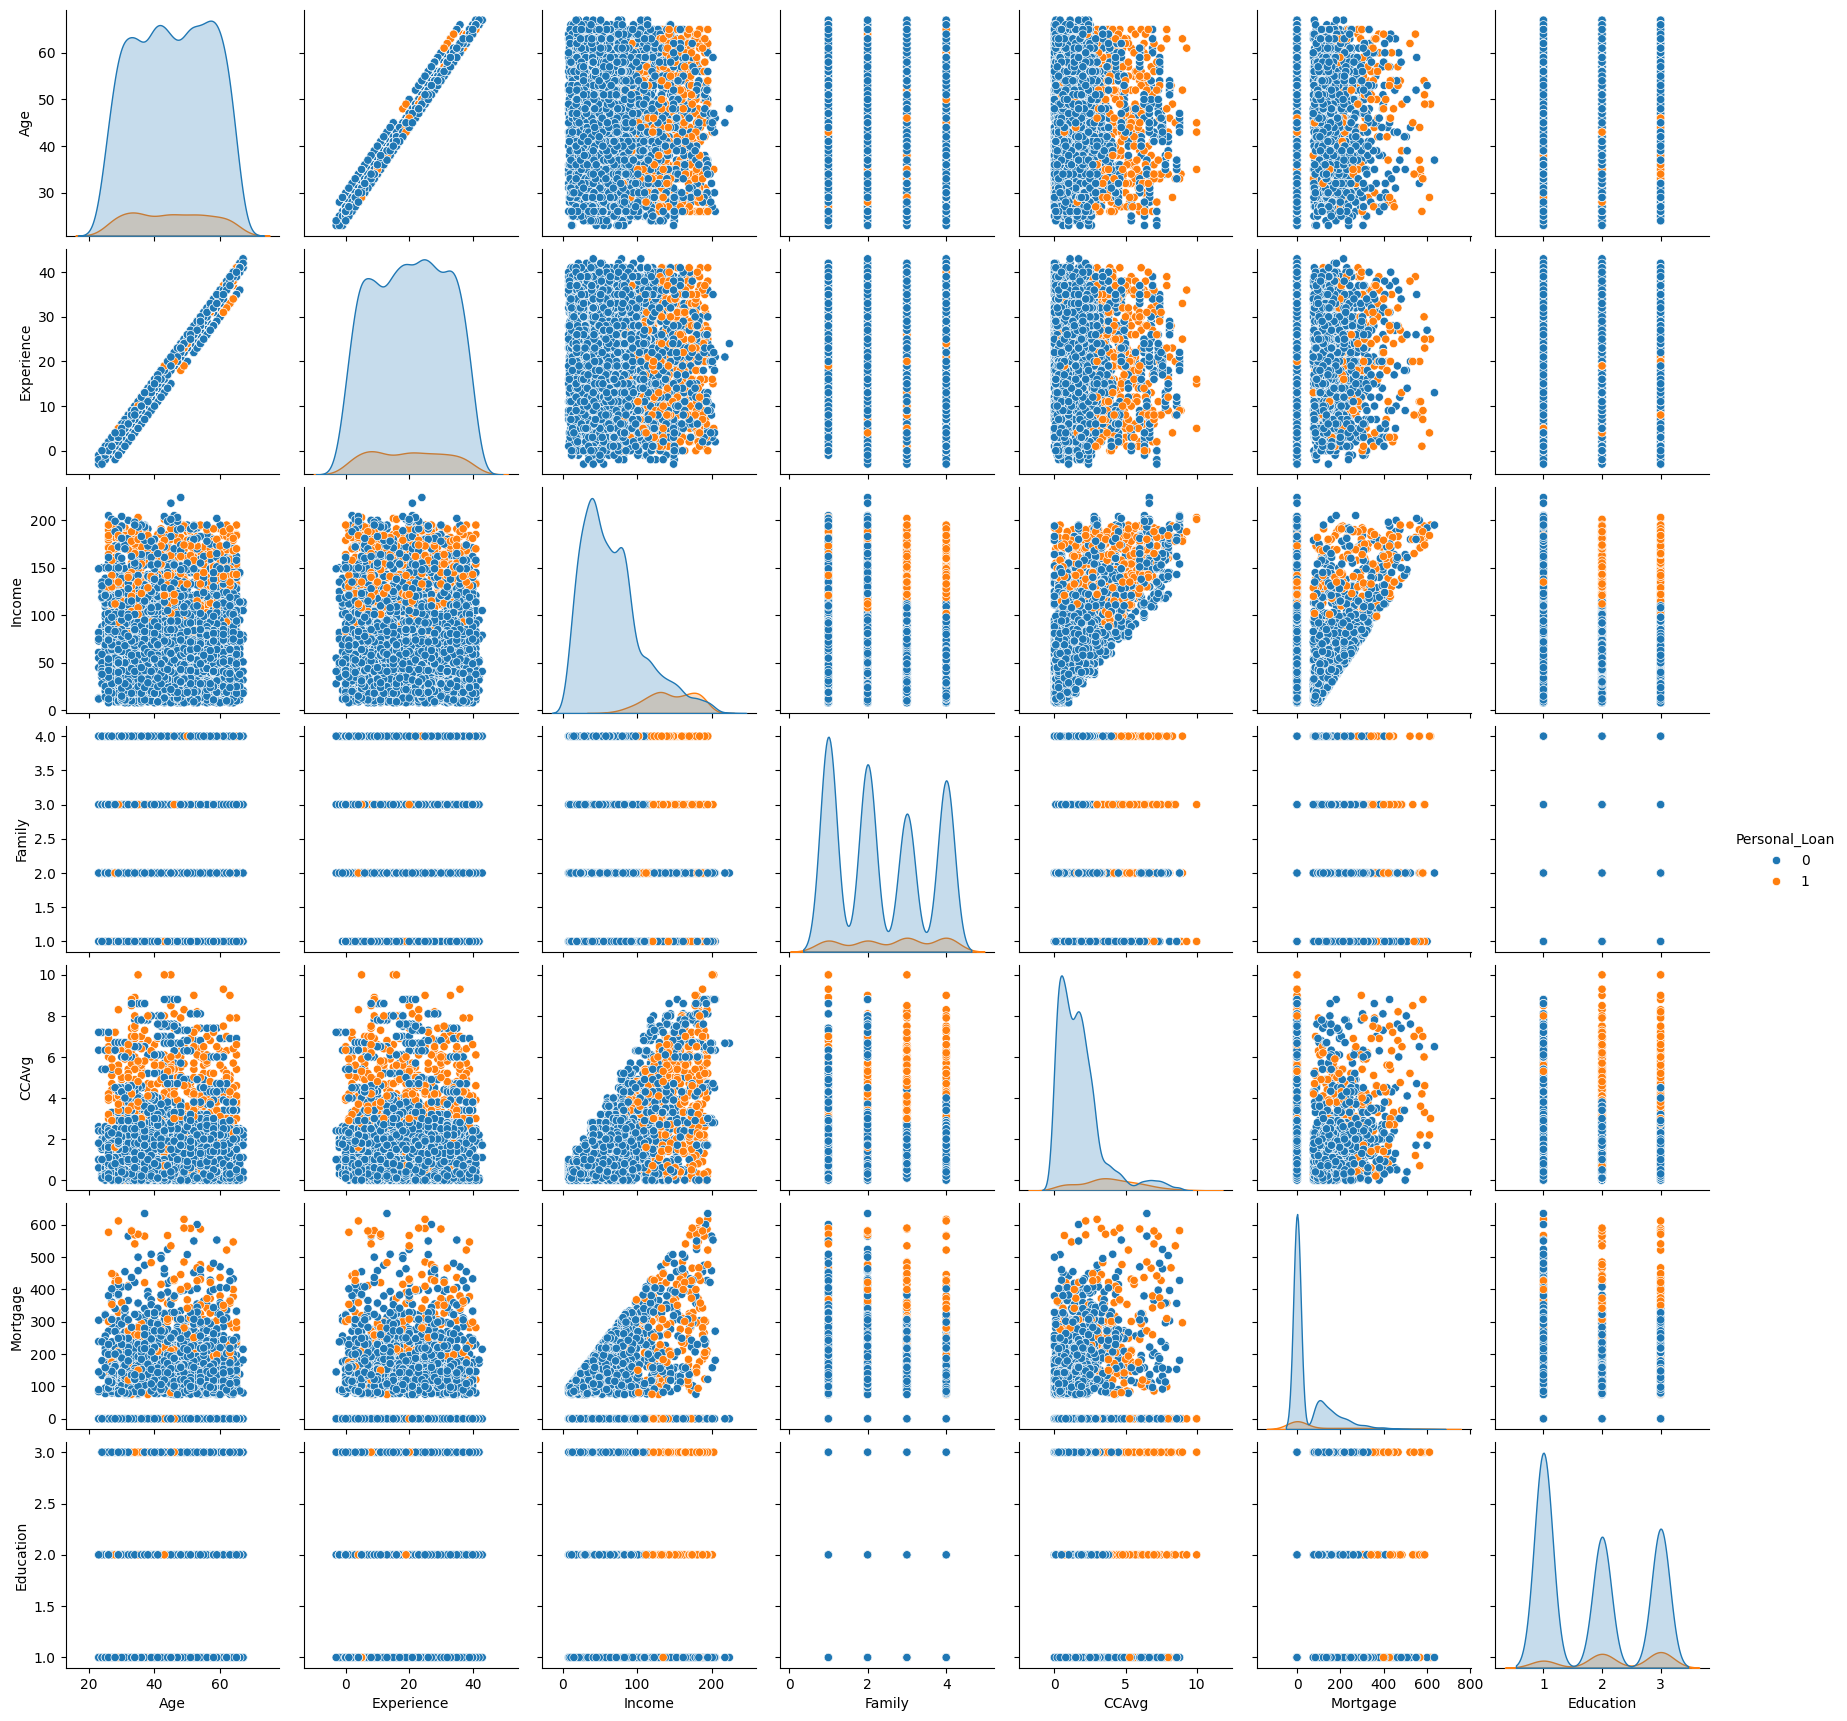

In [ ]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
# defining the list of numerical features to plot
num_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education']
sns.pairplot(df, vars=num_features, hue='Personal_Loan', diag_kind='kde');

* Some People with income greater than 100K applied for loans
* Some People with more than 4K in Credit Card spending did apply for loans
* Some People having mortage more than 300K did apply for loans
* Graduates and Advanced/Professional their income is greater than 100K and applied for loans
* Graduates and Advanced/Professional's Credit Card spending is more than 5K
* **People who spends more on Credit Card and Mortgage have tendency of applying for loans**

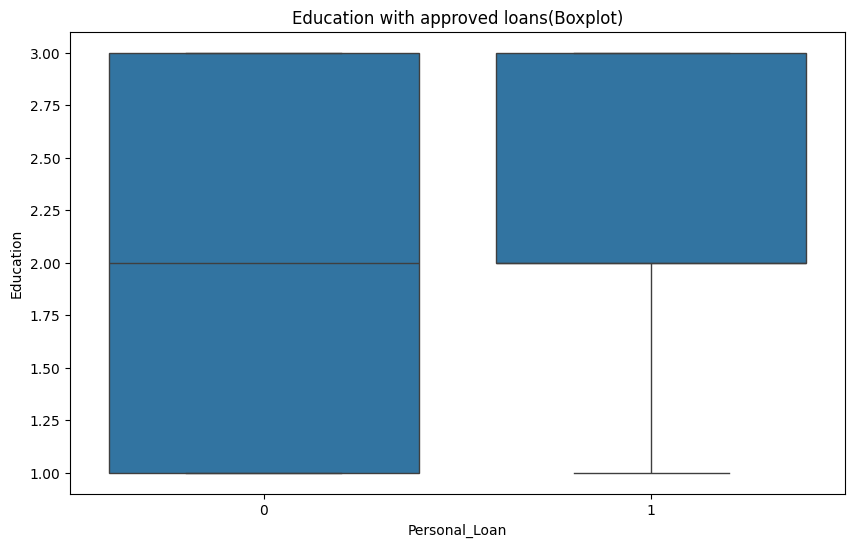

In [ ]:
# Education with approved loans
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Personal_Loan', y='Education');
plt.title('Education with approved loans(Boxplot)');

* Irrespective of education, some people didn't show interest for applying loans
* 75% People who applied for loans were either Graduates or Advanced/Professional degree holders.

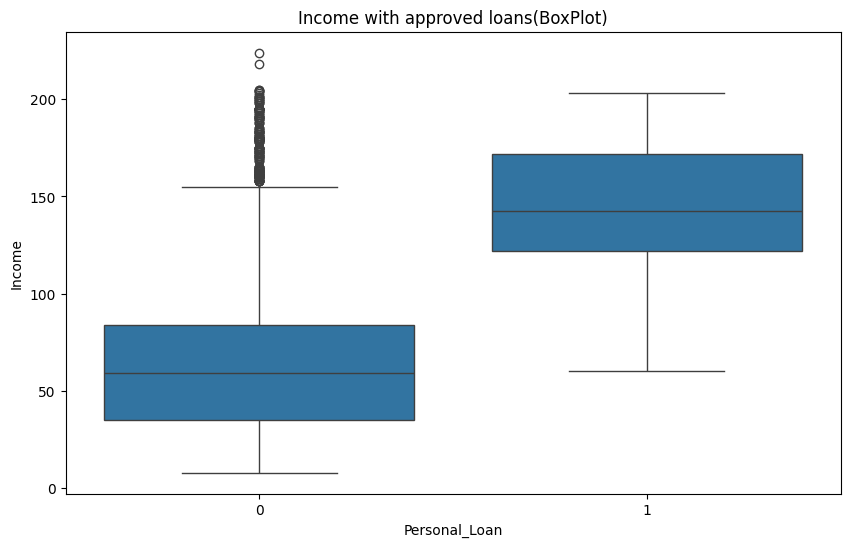

In [ ]:
# Income with approved loans
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Personal_Loan', y='Income');
plt.title('Income with approved loans(BoxPlot)');

* 75% of People who applied for personal loan has Income greter than 100K
* 75% of People who didn't apply for personal loan either Income is below 100K and There are outliers in Income data

**Note**
* Higher Debt doesn't implies customer are applying or getting approved for Loans, But few people do applied for loans
* Higher Education and Income do implies people can be attracted for loan campaign

## Data Preprocessing

### Feature Engineering

In [ ]:
newdf = df.copy()

In [ ]:
# Converting negative Experience values into positive
newdf["Experience"].replace(-1, 1, inplace=True)
newdf["Experience"].replace(-2, 2, inplace=True)
newdf["Experience"].replace(-3, 3, inplace=True)

In [ ]:
newdf['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])

In [ ]:
newdf["ZIPCode"] = newdf["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    newdf["ZIPCode"].str[0:2].nunique(),
)
# Lets take first two digit for Zipcode
newdf["ZIPCode"] = newdf["ZIPCode"].str[0:2]

newdf["ZIPCode"] = newdf["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
newdf['ZIPCode'].unique()

['91', '90', '94', '92', '93', '95', '96']
Categories (7, object): ['90', '91', '92', '93', '94', '95', '96']

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
newdf[cat_cols] = newdf[cat_cols].astype("category")

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB


### Preparing Data for Modeling

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = newdf.drop(["Personal_Loan", "Experience"], axis=1)
Y = newdf["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3000, 18)
Shape of test set :  (2000, 18)
Percentage of classes in training set:
Personal_Loan
0    0.904333
1    0.095667
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.9035
1    0.0965
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

* Lets define a utility function to collate all the metrics into a single data frame, and another to plot the confusion matrix.


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Note**: We want to maximize the F1 Score to ensure that we reduce both the chances of approving non-credible applications as well as rejecting credible ones.

### Decision Tree (sklearn default)

In [ ]:
dtree1 = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking the performance of the Train Model

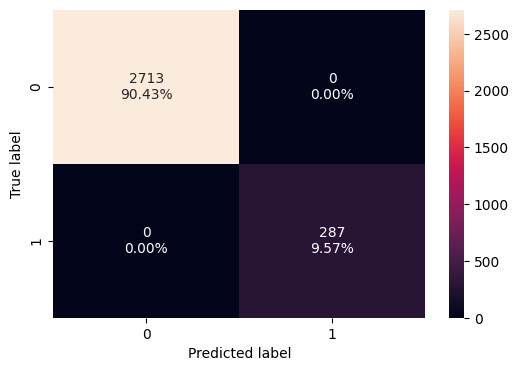

In [ ]:
confusion_matrix_sklearn(dtree1, X_train, y_train)

In [ ]:
dtree1_train_perf = model_performance_classification_sklearn(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking the performance on Test set

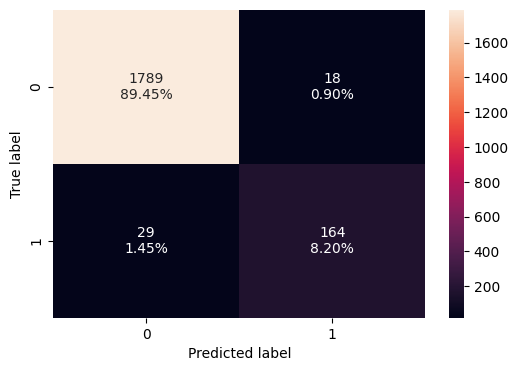

In [ ]:
confusion_matrix_sklearn(dtree1, X_test, y_test)

In [ ]:
dtree1_test_perf = model_performance_classification_sklearn(
    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.9765,0.849741,0.901099,0.874667


- There is a difference between the training and test F1 Scores.
- This indicates that the **model is overfitting**.

### Visualizing Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


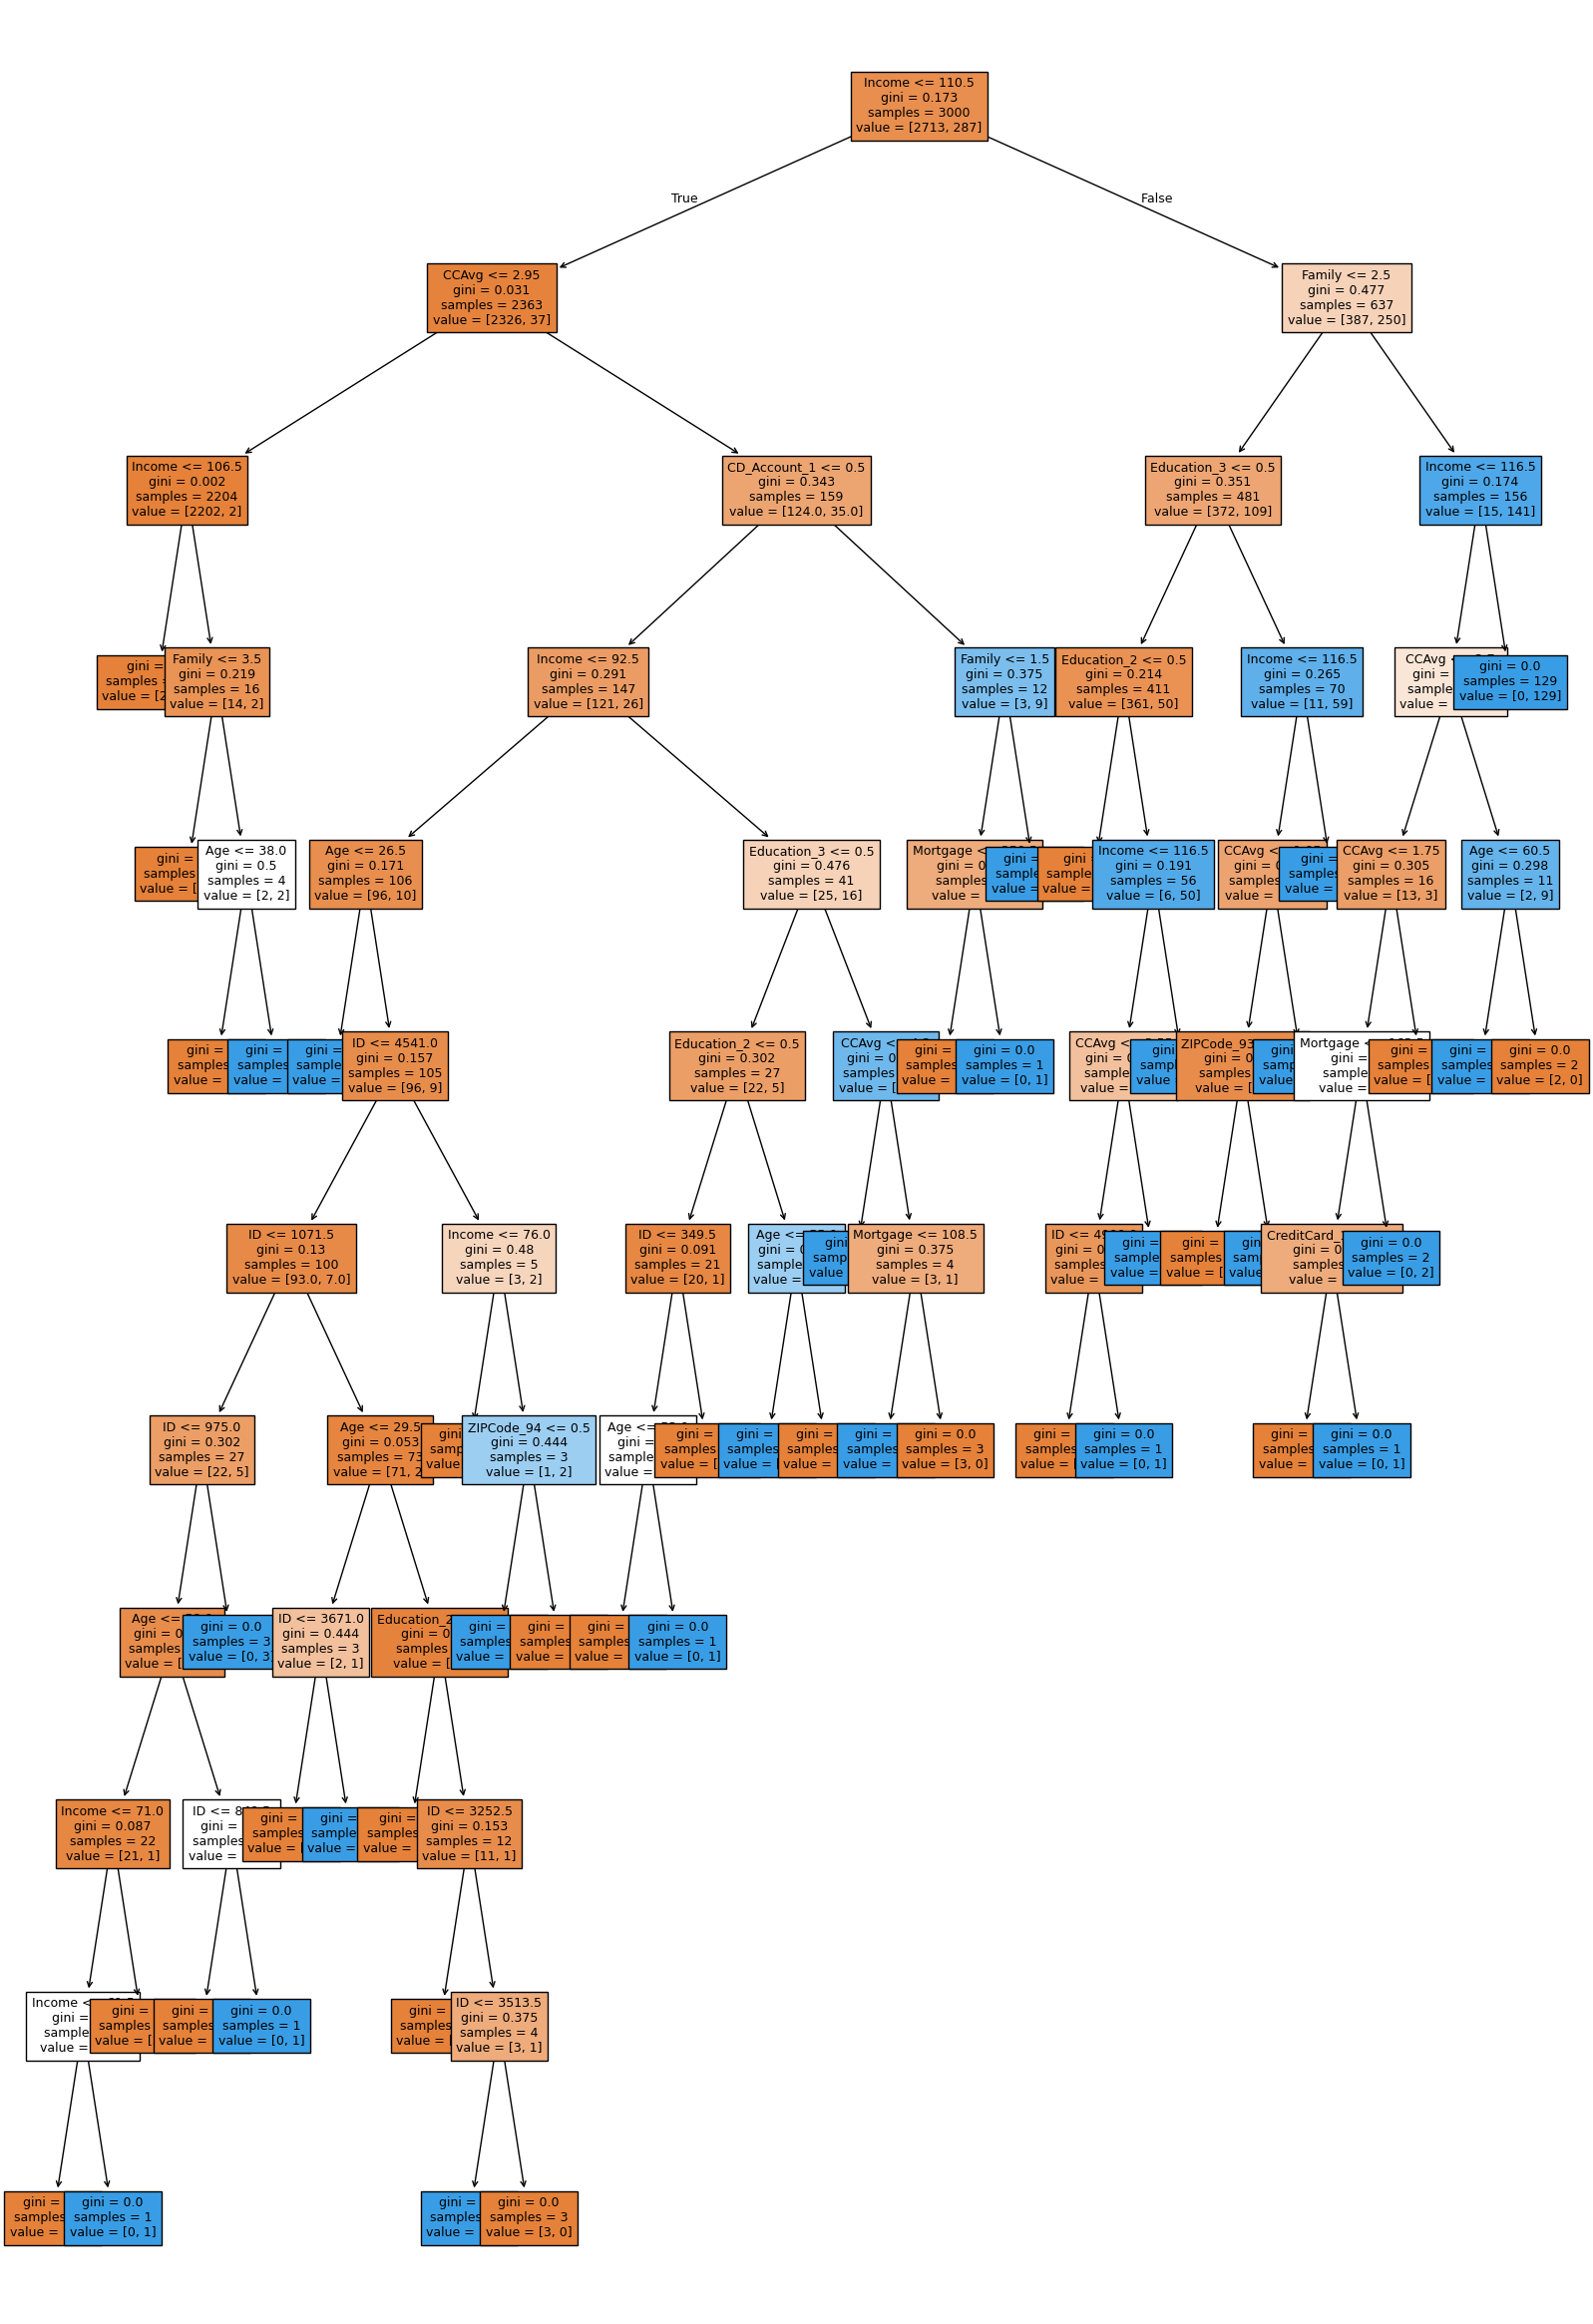

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This is complex tree

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree1, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 38.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Age >  38.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- ID <= 4541.00
|   |   |   |   |   |   |--- ID <= 1071.50
|   |   |   |   |   |   |   |--- ID <= 975.00
|   |   |   |   |   |   |   |   |--- Age <= 58.00
|   |   |   |   |   |   |   |   |   |--- Income <= 71.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 61.50
|   |   |   |   |   |   |   |   |   |

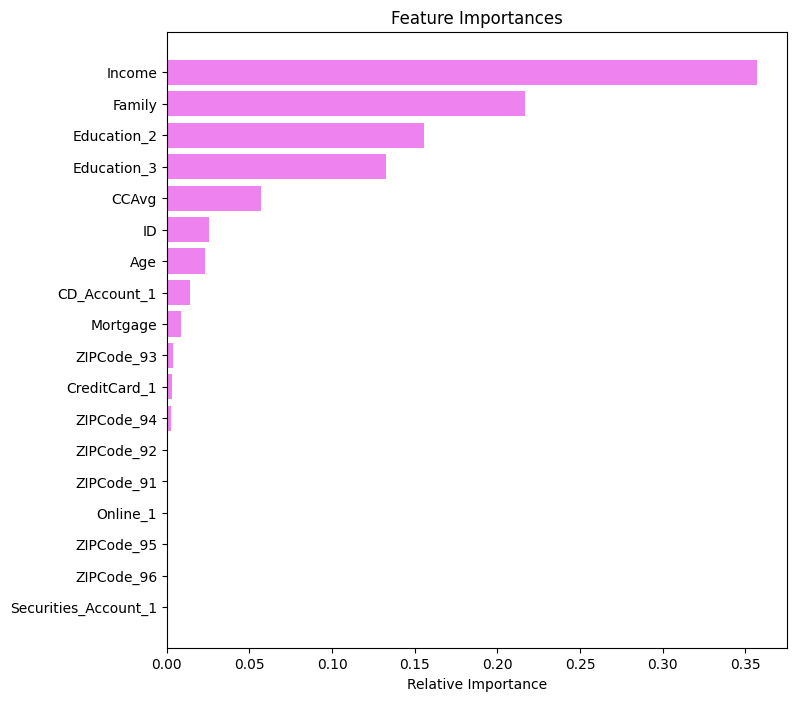

In [ ]:
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Improvement

### Decision Tree (Pre-pruning)

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# Fit the best algorithm to the data.
dtree2 = best_estimator
dtree2.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

### Checking Performance on Training Set

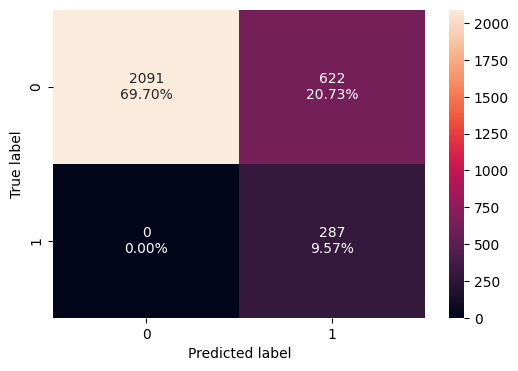

In [ ]:
confusion_matrix_sklearn(dtree2, X_train, y_train)

In [ ]:
dtree2_train_perf = model_performance_classification_sklearn( dtree2, X_train, y_train)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.792667,1.0,0.315732,0.479933


### Checking Perfomance on Test Set

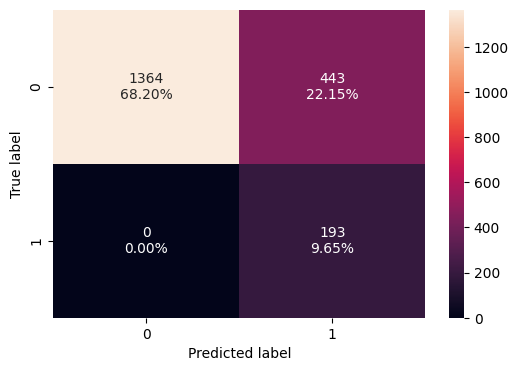

In [ ]:
confusion_matrix_sklearn(dtree2, X_test, y_test)

In [ ]:
dtree2_test_perf = model_performance_classification_sklearn( dtree2, X_test, y_test)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.7785,1.0,0.303459,0.465621


- The training and test scores are very close to each other, indicating a **generalized performance**.

### Visualizing Decision Tree

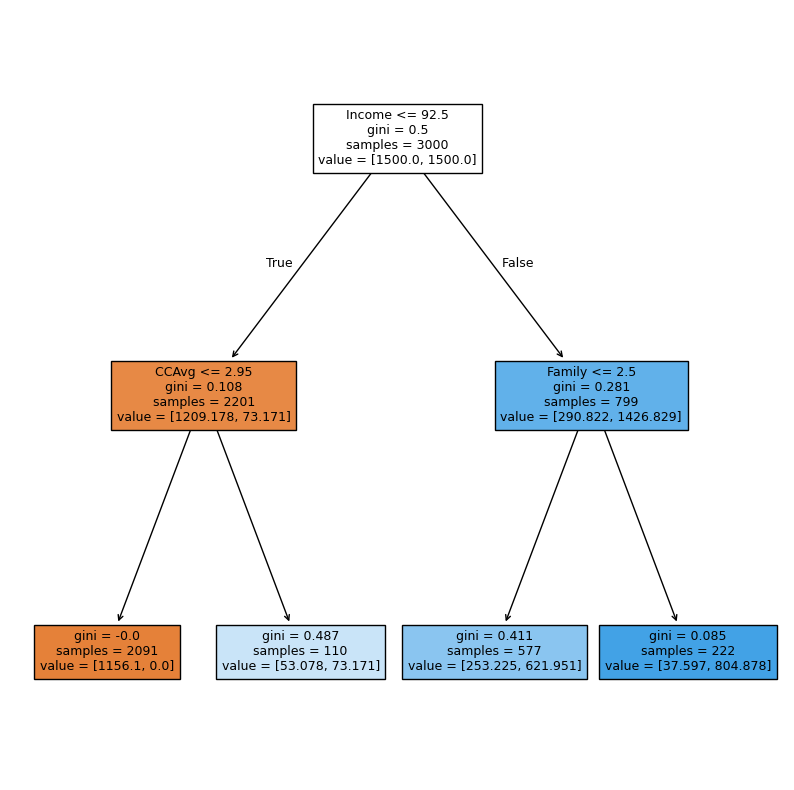

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    dtree2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- This is a far **less complex tree** than the previous one.
- We can observe the **decision tree rules much more clearly in the plot**.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1156.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [53.08, 73.17] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [253.23, 621.95] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [37.60, 804.88] class: 1



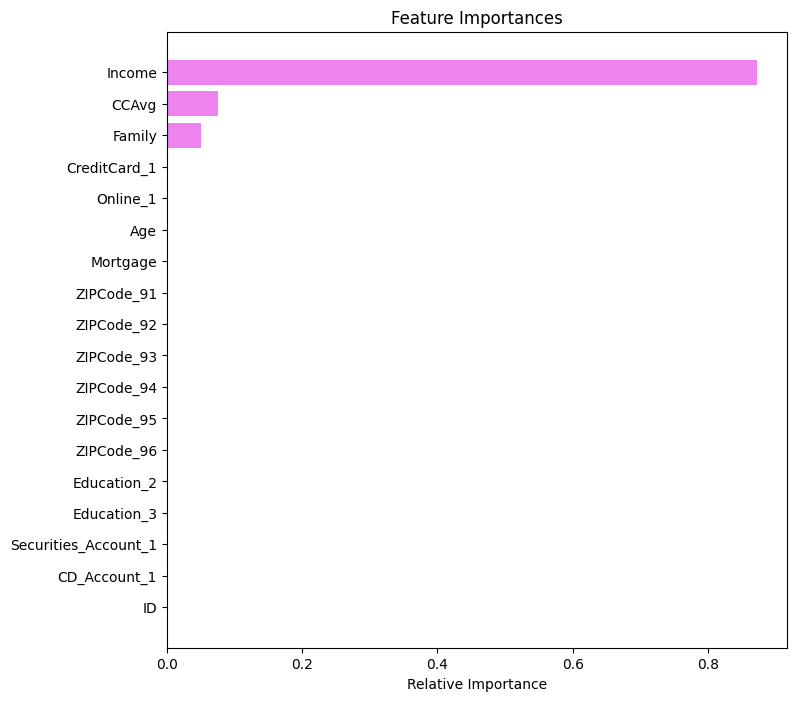

In [ ]:
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree(Post-Pruning)

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=1)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000219,0.000657
2,0.000306,0.001879
3,0.000317,0.002514
4,0.000320,0.003154
5,0.000400,0.003954
6,0.000444,0.005286
7,0.000500,0.005786
8,0.000500,0.006286
9,0.000500,0.007286


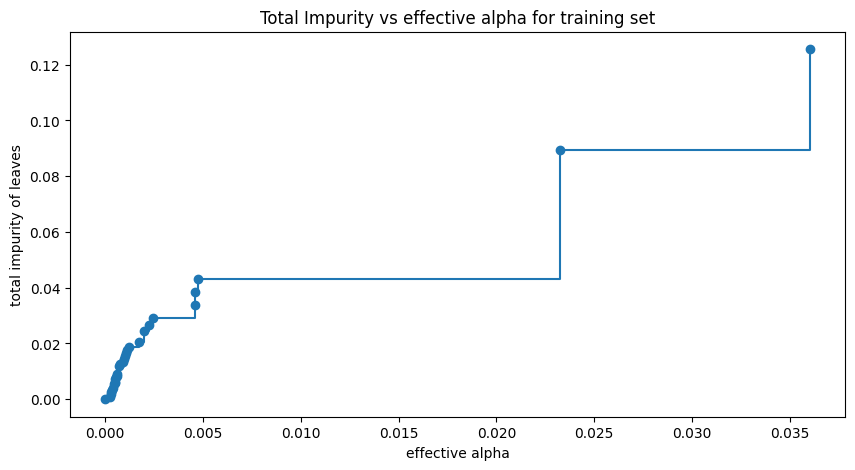

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Next, we train a decision tree **using the effective alphas**.

- The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04749278966498974


- Moving ahead, we remove the last element in
``clfs`` and ``ccp_alphas`` as it corresponds to a trivial tree with only one
node.

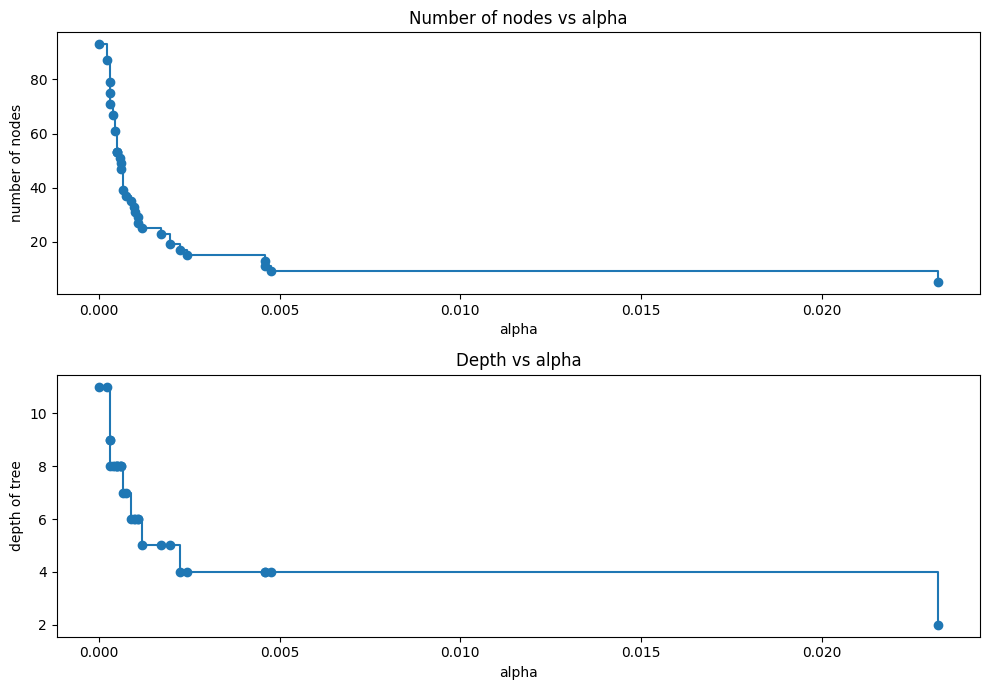

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

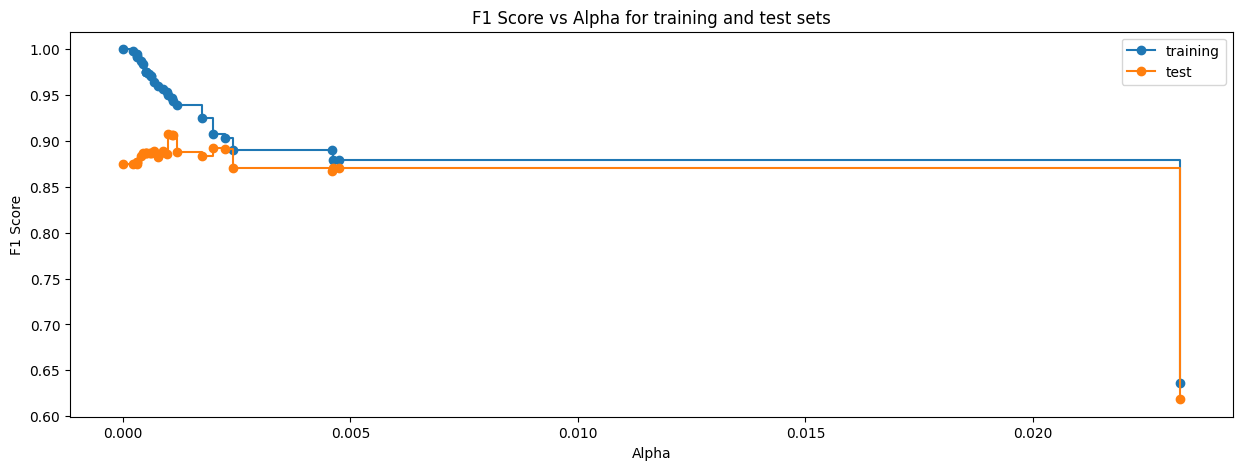

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=1)


### Checking Model performance on Training set

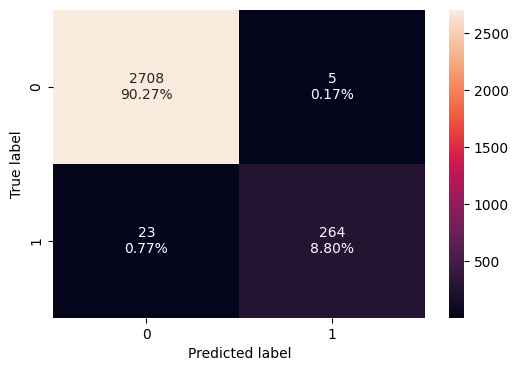

In [ ]:
confusion_matrix_sklearn(dtree3, X_train, y_train)

In [ ]:
dtree3_train_perf = model_performance_classification_sklearn(
    dtree3, X_train, y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.990667,0.919861,0.981413,0.94964


### Checking Model Performance on Test Set

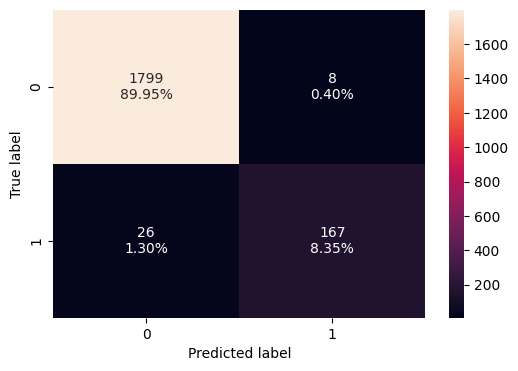

In [ ]:
confusion_matrix_sklearn(dtree3, X_test, y_test)

In [ ]:
dtree3_test_perf = model_performance_classification_sklearn(
    dtree3, X_test, y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.983,0.865285,0.954286,0.907609


* Test score is less than Training score during post pruning, indicating overfit.

### Visualizing Decision Tree

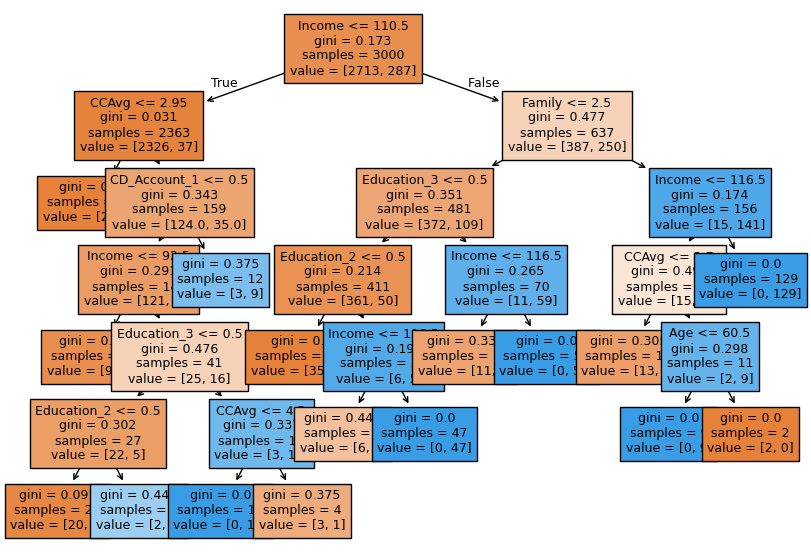

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

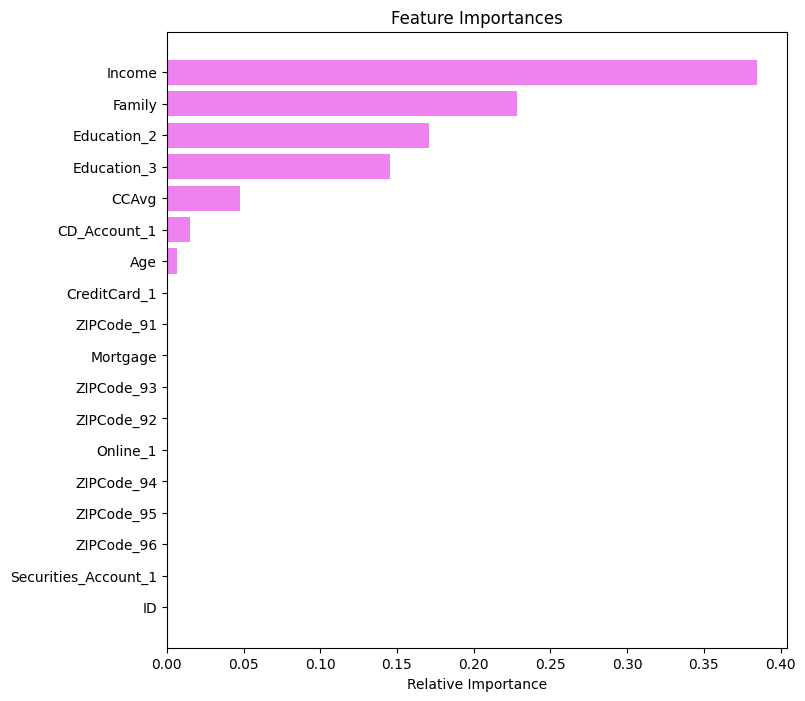

In [ ]:
# importance of features in the tree building
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.792667,0.990667
Recall,1.0,1.000000,0.919861
Precision,1.0,0.315732,0.981413
F1,1.0,0.479933,0.949640


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.976500,0.778500,0.983000
Recall,0.849741,1.000000,0.865285
Precision,0.901099,0.303459,0.954286
F1,0.874667,0.465621,0.907609


- Both the pre-pruned decision trees on test and train data exhibit generalized performances.
- Post-Pruning on Train data exihibits overfitting characterstic, but test data is comparatively low
    - This will result in a low prediction time but it might not be able to perform well on edge cases in unseen data.
- The pre-pruned decision tree has almost the same performance on training and test sets.
    - This will result in a slightly longer prediction time but it is likely to yield better results on unseen data.
- **We'll move ahead with the pre-pruned decision tree as our final model.**


### Predection on a single data points

In [ ]:
%%time
# Generating Random number
random_numbers_array = np.random.randint(1, 500, size=10)


for i in random_numbers_array:
  # choosing a data point
  applicant_details = X_test.iloc[[i]]
  print("Applicant row_ID - ",i)

  # making a prediction
  approval_prediction = dtree2.predict(applicant_details)
  print("Approval Prediction(0 - Fails, 1 - Pass), - ",approval_prediction)

  # making a prediction
  approval_likelihood = dtree2.predict_proba(applicant_details)

  print("Likelyhood of - ",approval_likelihood[0, 1], "% approval")

Applicant row_ID -  51
Approval Prediction(0 - Fails, 1 - Pass), -  [1]
Likelyhood of -  0.9553734353491048 % approval
Applicant row_ID -  422
Approval Prediction(0 - Fails, 1 - Pass), -  [0]
Likelyhood of -  0.0 % approval
Applicant row_ID -  275
Approval Prediction(0 - Fails, 1 - Pass), -  [0]
Likelyhood of -  0.0 % approval
Applicant row_ID -  151
Approval Prediction(0 - Fails, 1 - Pass), -  [1]
Likelyhood of -  0.7106580995084641 % approval
Applicant row_ID -  30
Approval Prediction(0 - Fails, 1 - Pass), -  [0]
Likelyhood of -  0.0 % approval
Applicant row_ID -  9
Approval Prediction(0 - Fails, 1 - Pass), -  [1]
Likelyhood of -  0.7106580995084641 % approval
Applicant row_ID -  5
Approval Prediction(0 - Fails, 1 - Pass), -  [0]
Likelyhood of -  0.0 % approval
Applicant row_ID -  230
Approval Prediction(0 - Fails, 1 - Pass), -  [0]
Likelyhood of -  0.0 % approval
Applicant row_ID -  107
Approval Prediction(0 - Fails, 1 - Pass), -  [1]
Likelyhood of -  0.9553734353491048 % approval
A

* Model was executed for 10 random customers
* It took ~110 ms to predict on random 10 customers
* This model provides information on Approval/Reject and ratio of approval percentage
* [0] - Indicates not approved by model
* [1] - Indicates loans can be approved with approval rates
* Customer with row_id of 151 has approval rate of 70%
* Customer with row_id of 107 has approval of 95%


## Actionable Insights and Business Recommendations


-  The bank can deploy pre-pruned model for the for running marketing campaign and loan approval process
-  Main factors that can make camapign successfull is Income and ability of customers to spend

- Instead of outputting an approve or reject, the model can be made to output the likelihood of approval.

- In case the likelihood of approval is below a certain threshold, say 65%, then the application can be sent for manual inspection.

- This would reduce the overall turn around time for the initial screening.

In [ ]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/AIMLColab/Machine Learning/ML-Project/AIML_ML_Project_full_code_notebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIMLColab/Machine Learning/ML-Project/AIML_ML_Project_full_code_notebook.ipynb to html
[NbConvertApp] Writing 4370520 bytes to /content/drive/MyDrive/AIMLColab/Machine Learning/ML-Project/AIML_ML_Project_full_code_notebook.html


___